In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
def show_success_rate(episode_rewards):
    episodes = len(episode_rewards)
    episode_unit = 1000
    rates = np.average(episode_rewards.reshape(
        [episodes//episode_unit, episode_unit]), axis=1)*100
    x = [(i+1)*episode_unit for i in range(episodes//episode_unit)]
    plt.plot(x, rates)
    plt.title(f'Success rate per {episode_unit} episodes')
    plt.xlabel('Episode (th times)')
    plt.ylabel('Success rate (%)')


In [6]:
class ActorCriticAgent:
    def __init__(self, n_states, n_actions, gamma) -> None:
        self.actor = self.Actor(n_states, n_actions)
        self.critic = self.Critic(n_states, n_actions, gamma)
        self.gamma = gamma

    def take_action(self, state):
        return self.actor.take_action(state)

    def learn(self, state, action, reward, next_state, alpha):
        td_error = self.critic.get_td_error(
            state, action, reward, next_state, alpha)
        self.actor.update_policy(state, action, td_error, alpha)
        self.critic.update_V(state, td_error, alpha)

    class Actor:
        def __init__(self, n_states, n_actions) -> None:
            self.n_actions = n_actions
            self.Q = np.random.uniform(size=(n_states, n_actions))
            self.policy = np.full((n_states, n_actions), 1/n_actions)

        def __softmax(self, x):
            return np.exp(x)/np.sum(np.exp(x), axis=0)

        def update_policy(self, state, action, td_error, alpha):
            self.__update_Q(state, action, td_error, alpha)
            self.policy[state] = self.__softmax(self.Q[state])

        def take_action(self, state):
            actions = [i for i in range(self.n_actions)]
            action = np.random.choice(actions, p=self.policy[state])
            return action

        def __update_Q(self, state, action, td_error, alpha):
            self.Q[state][action] += alpha*td_error

    class Critic:
        def __init__(self, n_states, n_actions, gamma) -> None:
            self.n_actions = n_actions
            self.V = np.zeros((n_states))
            self.gamma = gamma

        def get_td_error(self, state, action, reward, next_state, alpha):
            gain = reward+self.gamma*self.V[next_state]
            estimated = self.V[state]
            td_error = gain-estimated
            return td_error

        def update_V(self, state, td_error, alpha):
            self.V[state] += alpha*td_error


In [35]:
ALPHA = 0.3
GAMMA = 0.99
EPISODES = 20000
ENV = 'FrozenLake-v1'


def main():
    env = gym.make(ENV, is_slippery=True)
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    agent = ActorCriticAgent(n_states, n_actions, GAMMA)
    episode_rewards = np.zeros((EPISODES))

    for e in range(EPISODES):
        state = env.reset()
        done = False
        alpha = ALPHA*e/EPISODES
        while not done:
            action = agent.take_action(state)
            next_state, reward, done, info = env.step(action)
            agent.learn(state, action, reward, next_state, alpha)
            state = next_state
            episode_rewards[e] += reward
        
        
        if(e % 1000 == 0 and e != 0):
            print(f'{e}/{EPISODES} episode completed')

    return episode_rewards

1000/20000 episode completed
2000/20000 episode completed
3000/20000 episode completed
4000/20000 episode completed
5000/20000 episode completed
6000/20000 episode completed
7000/20000 episode completed
8000/20000 episode completed
9000/20000 episode completed
10000/20000 episode completed
11000/20000 episode completed
12000/20000 episode completed
13000/20000 episode completed
14000/20000 episode completed
15000/20000 episode completed
16000/20000 episode completed
17000/20000 episode completed
18000/20000 episode completed
19000/20000 episode completed


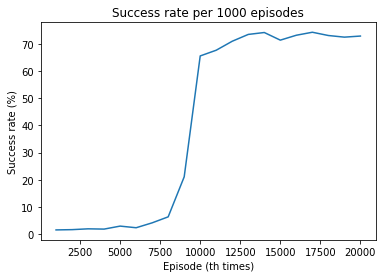

In [37]:
episode_rewards = main()
show_success_rate(episode_rewards)

In [18]:
def testPolicy(agent, trials=100):
    env = gym.make("FrozenLake-v1", is_slippery=True)
    env.reset()
    success = 0

    for _ in range(trials):
        done = False
        state = env.reset()
        while not done:
            action = agent.take_action(state)
            state, _, done, _ = env.step(action)
            if state == 15:
                success += 1

    avg_success_rate = success / trials
    return avg_success_rate

In [31]:
def plot(success_rate, title):
    """
    Plots for success rate over every iteration

    :param success_rate: list, a list of success rate
    :param title: str, plot title
    """
    plt.figure()
    plt.plot(success_rate)
    plt.title(title)
    plt.xlabel("Episode")
    plt.ylabel("Success rate")
    plt.savefig(title + ".png", dpi=150)
    plt.show()

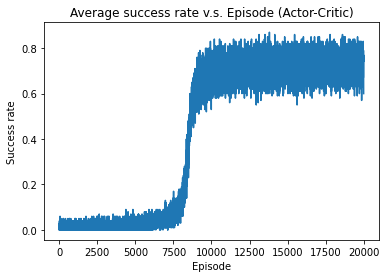

In [36]:
plot(success_rate, "Average success rate v.s. Episode (Actor-Critic)")